## K-Means Clustering

**Overview**<br>


Choose strike rate and average as the two factors on which you will cluster the data. You don’t need to clean the data. Just scale the data using the scale command and create the clusters.

## Pointers before you proceed:

- standardise all parameters using standard_scaler.fit_transform() and save the output to a variable before you proceed. (check the K-Means code)
- Choose random_state=100 for running K-Means in Python with SKLearn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings ("ignore")

In [2]:
df = pd.read_csv ("Cricket.csv", sep = ",", header = 0, engine = 'python')
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [3]:
help ('groupby')

No Python documentation found for 'groupby'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



In [7]:
## Grouping the determning columns 
grp_df = df.groupby ('Player')['Ave'].sum ()
grp_df = grp_df. reset_index ()
grp_df.columns  = ['Player','Average']
grp_df

,Player,Average
0,A Flower (ZIM),35.34
1,A Jadeja (INDIA),37.47
2,A Ranatunga (SL),35.84
3,A Symonds (AUS),39.75
4,AB de Villiers (Afr/SA),53.55
...,...,...
74,V Sehwag (Asia/ICC/INDIA),35.05
75,WJ Cronje (SA),38.64
76,WU Tharanga (Asia/SL),34.30
77,Younis Khan (PAK),31.24


In [8]:
rs_df = df.groupby ('Player')['SR'].sum ()
rs_df = rs_df. reset_index ()
rs_df.columns  = ['Player','Score Rate']
rs_df

,Player,Score Rate
0,A Flower (ZIM),74.59
1,A Jadeja (INDIA),69.80
2,A Ranatunga (SL),77.90
3,A Symonds (AUS),92.44
4,AB de Villiers (Afr/SA),100.25
...,...,...
74,V Sehwag (Asia/ICC/INDIA),104.33
75,WJ Cronje (SA),76.47
76,WU Tharanga (Asia/SL),75.03
77,Younis Khan (PAK),75.29


In [9]:
grouped_df = pd.merge (grp_df, rs_df, on = 'Player', how ='inner')
grouped_df

,Player,Average,Score Rate
0,A Flower (ZIM),35.34,74.59
1,A Jadeja (INDIA),37.47,69.80
2,A Ranatunga (SL),35.84,77.90
3,A Symonds (AUS),39.75,92.44
4,AB de Villiers (Afr/SA),53.55,100.25
...,...,...,...
74,V Sehwag (Asia/ICC/INDIA),35.05,104.33
75,WJ Cronje (SA),38.64,76.47
76,WU Tharanga (Asia/SL),34.30,75.03
77,Younis Khan (PAK),31.24,75.29


In [11]:
# 2. rescaling

new_df = grouped_df [['Average','Score Rate']]

#instantiate a scaler 
scaler = StandardScaler ()

#fit_transfrorm

new_df_scaled = scaler.fit_transform (new_df)
new_df_scaled = pd.DataFrame (new_df_scaled)
new_df_scaled.columns = ['Average','Score Rate']
new_df_scaled.head ()

,Average,Score Rate
0,-0.541237,-0.477102
1,-0.179085,-0.962790
2,-0.456225,-0.141480
3,0.208570,1.332823
4,2.554906,2.124728


In [12]:
# k-means with some arbitary k 
kmeans = KMeans (n_clusters = 4, max_iter = 50)
kmeans.fit (new_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [13]:
kmeans.labels_

array([1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 3, 1, 3, 0, 1, 1, 3, 3, 1, 3, 0, 3,
       3, 3, 1, 0, 2, 3, 2, 1, 3, 3, 1, 3, 3, 3, 1, 3, 2, 2, 3, 2, 3, 1,
       1, 2, 3, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 0, 1, 2, 0, 1,
       0, 3, 1, 0, 1, 0, 1, 2, 0, 3, 1, 1, 0])

In [31]:
pd.set_option('display.max_rows', None)
Cluster_df = pd.DataFrame( data = kmeans.labels_, columns = ['Cluster_ID'] ,index = grouped_df)
Cluster_df.sort_values(by=["Cluster_ID"],ascending=True)

,Cluster_ID
"(G Kirsten (SA), 40.95, 72.04)",0
"(A Jadeja (INDIA), 37.47, 69.8)",0
"(Javed Miandad (PAK), 41.7, 67.01)",0
"(DL Haynes (WI), 41.37, 63.09)",0
"(DC Boon (AUS), 37.04, 65.13)",0
"(S Chanderpaul (WI), 41.6, 70.74)",0
"(CG Greenidge (WI), 45.03, 64.92)",0
"(R Dravid (Asia/ICC/INDIA), 39.16, 71.24)",0
"(MS Atapattu (SL), 37.57, 67.72)",0
"(IVA Richards (WI), 47.0, 90.2)",1


## Finding the optimal number of clusters

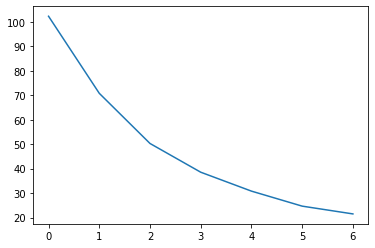

In [15]:
# elbow-curve/ssd (sum of squared distances)
ssd = [] #initiating a new list
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans (n_clusters = num_clusters, max_iter = 100)
    kmeans.fit (new_df_scaled)
    ssd.append (kmeans.inertia_)
    
#plot the SSDz for each n_clusters
plt.plot(ssd)

In [17]:
# silhouette analysis 
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    #initialize kmeans
    kmeans = KMeans (n_clusters = num_clusters, max_iter = 100)
    kmeans.fit (new_df_scaled)
    cluster_labels = kmeans.labels_
    #silhouette score
    silhouette_avg = silhouette_score(new_df_scaled, kmeans.labels_)
    print ("For n_clusters = {0}, the silhouette score is {1}".format (num_clusters,silhouette_avg))

For n_clusters = 2, the silhouette score is 0.37632823237612384
For n_clusters = 3, the silhouette score is 0.3718580419393656
For n_clusters = 4, the silhouette score is 0.3840156011106743
For n_clusters = 5, the silhouette score is 0.36858208433621903
For n_clusters = 6, the silhouette score is 0.39076607561074883
For n_clusters = 7, the silhouette score is 0.38301845780271
For n_clusters = 8, the silhouette score is 0.3891868928159904
